In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='charges', ylabel='age'>

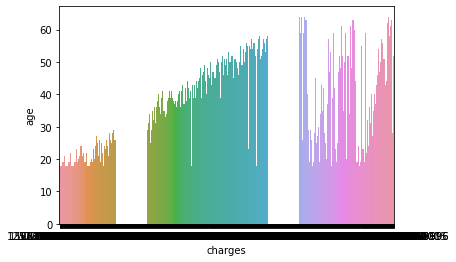

In [4]:
sns.barplot(data['charges'], data['age'])

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


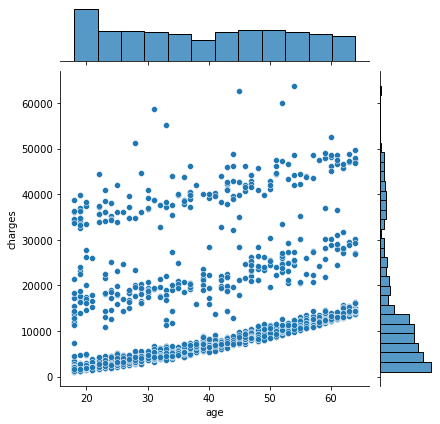

In [5]:
sns.jointplot(data['age'], data['charges'])

In [6]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [7]:
data = pd.read_csv("insurance.csv")

In [8]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
print("Total missing values:" , data.isna().sum().sum())

Total missing values: 0


In [11]:
data['children'] = data['children'].astype(str)

In [12]:
print("Total non-numeric columns:" , len(data.select_dtypes('object').columns))

Total non-numeric columns: 4


In [13]:
{column: list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'sex': ['female', 'male'],
 'children': ['0', '1', '3', '2', '5', '4'],
 'smoker': ['yes', 'no'],
 'region': ['southwest', 'southeast', 'northwest', 'northeast']}

In [14]:
def binary_encode(df, column, positive_value): 
    df = df.copy() 
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0) 
    return df

def onehot_encode(df, column, prefix) :
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix) 
    df = pd.concat([df, dummies], axis=1) 
    df = df.drop(column, axis=1)
    return df

In [15]:
def preprocess_inputs(df, scaler, train_size=0.7):  
    
    df= df.copy()        
    df = binary_encode(df, 'sex', 'male')   
    df = binary_encode(df, 'smoker', 'yes')      
    
    df= onehot_encode(df, 'children', 'ch')    
    df= onehot_encode(df, 'region', 're')        
    
    y = df['charges'].copy()    
    X = df.drop('charges', axis=1).copy()     
    
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)       
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=123)        
    
    return  X_train, X_test, y_train, y_test 

In [16]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
X_train, X_test, y_train, y_test = preprocess_inputs(data, StandardScaler(), train_size= 0.7)

In [18]:
models = {   
    '          OLS Model:': LinearRegression(), 
    '           L2 Model:': Ridge(),  
    '           L1 Model:': Lasso(),  
    '   ElasticNet Model:': ElasticNet(),  
    '        L2 CV Model:': RidgeCV(),  
    '        L1 CV Model:': LassoCV(), 
    ' ElasticNetCV Model:': ElasticNetCV(),
}

for model in models.values():   
    model.fit(X_train, y_train)

In [19]:
print("Model R^2 Score:\\n n...................")

for name, model in models.items(): 
    print(name, model.score(X_test, y_test))


Model R^2 Score:\n n...................
          OLS Model: 0.7592753839574071
           L2 Model: 0.759357936403609
           L1 Model: 0.7593697076110315
   ElasticNet Model: 0.6722813607835507
        L2 CV Model: 0.7593579364036602
        L1 CV Model: 0.760087586650097
 ElasticNetCV Model: 0.13980401601000714
